In [16]:
import numpy as np

Evaluation on the best CNN on the test set

In [17]:
%store -r X_train
%store -r y_train
%store -r X_val
%store -r y_val

#these are all stored from the notebook cnn_classification.ipynb, to make sure that training and parameter tuning are implemented on the exact same data

In [18]:
%store -r X_test

#stored from the notebook test_preprocessing_part2.ipynb

In [19]:
%store -r y_test

#stored from the notebook test_preprocessing_part2.ipynb

In [20]:
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [21]:
y_test=y_test.to_numpy()
y_test=np.array(y_test.tolist())

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [23]:
model = Sequential()

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(1, 219)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))

# Output layer with 6 units for classification
model.add(Dense(4, activation='softmax'))

# Create an optimizer with an initial learning rate
optimizer = Adam(learning_rate=0.0001)

# Use ReduceLROnPlateau callback to adjust learning rate during training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 1, 128)            │     84,224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1, 128)            │     49,280 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_1          │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 512)               │     66,048 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 4)                 │      2,052 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 513,540 (1.96 MB)

 Trainable params: 513,540 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2204 - loss: 1.3861 - val_accuracy: 0.2653 - val_loss: 1.3775
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2782 - loss: 1.3789 - val_accuracy: 0.3953 - val_loss: 1.3641
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3497 - loss: 1.3715 - val_accuracy: 0.4440 - val_loss: 1.3436
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4148 - loss: 1.3455 - val_accuracy: 0.4404 - val_loss: 1.3469
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4462 - loss: 1.3440 - val_accuracy: 0.4332 - val_loss: 1.3303
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4318 - loss: 1.3389 - val_accuracy: 0.4116 - val_loss: 1.3299
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4555 - loss: 1.3316 - val_accuracy: 0.4350 - val_loss: 1.3291
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4618 - loss: 1.3308 - val_accuracy: 0.4296 - val_loss: 1.

In [25]:
from sklearn.metrics import classification_report

# Assuming model.predict is used to get predicted probabilities for X_test
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels to integers (if needed)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_labels))


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.13      0.14       308
           1       0.20      0.33      0.25       276
           2       0.35      0.11      0.17       498
           3       0.30      0.43      0.35       494

    accuracy                           0.25      1576
   macro avg       0.25      0.25      0.23      1576
weighted avg       0.27      0.25      0.23      1576



50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2347 - loss: 2.0070
Test Loss: 3.5554
Test Accuracy: 0.2519


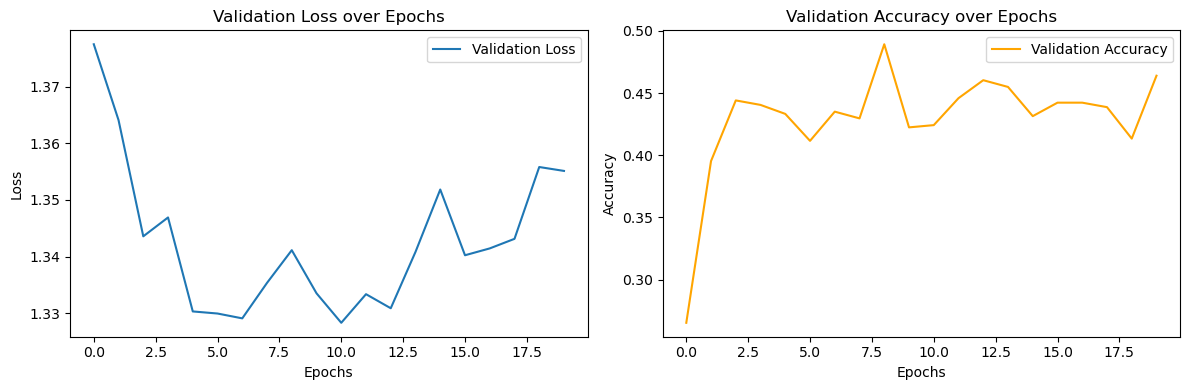

In [26]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=1)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the test loss and test accuracy over epochs
plt.figure(figsize=(12, 4))

# Plot test loss
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


